In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from src.data import build_dataloaders

try:
    result = build_dataloaders(
        data_root="../data",
        size=224,
        batch_size=10,
        seed=67,
        augmentationTier=3,
    )
    train_loader, val_loader, test_loader, meta = result
except Exception as e:
    print("Failed to build dataloaders:", e)
    raise

# Get one batch (only if build succeeded)
images, labels = next(iter(train_loader))

Discovered 21710 samples in 10 classes.
Augmentation Tier 3 - Train/val/test split: 17380/2165/2165


In [2]:
print("Batch shape:", images.shape)   # expect [B, 3, 224, 224]
print("Labels:", labels)
print("dtype:", images.dtype)

Batch shape: torch.Size([10, 3, 224, 224])
Labels: tensor([4, 4, 0, 6, 2, 5, 5, 8, 1, 0])
dtype: torch.float32


In [7]:
import numpy as np

# ImageNet stats if you used them
mean = np.array([0.485, 0.456, 0.406])
std  = np.array([0.229, 0.224, 0.225])

# Make a grid
grid = make_grid(images, nrow=5)
npimg = grid.numpy().transpose((1, 2, 0))

# Unnormalize
npimg = std * npimg + mean
npimg = np.clip(npimg, 0, 1)


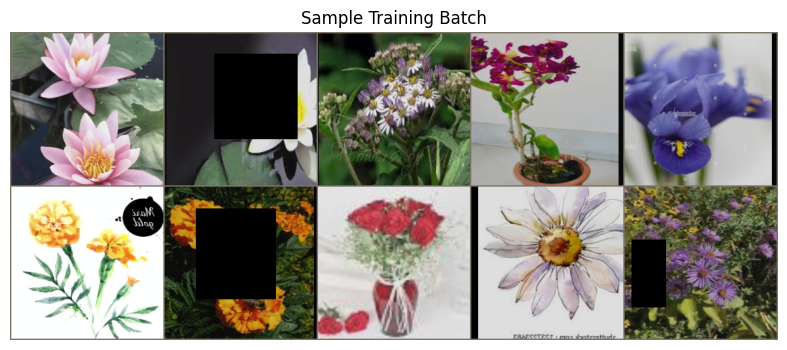

0: Lily
1: Lily
2: Aster
3: Orchid
4: Iris
5: Marigold
6: Marigold
7: Rose
8: Daisy
9: Aster


In [8]:
plt.figure(figsize=(12, 4))
plt.imshow(npimg)
plt.title("Sample Training Batch")
plt.axis("off")
plt.show()
for i, label in enumerate(labels):
    print(f"{i}: {meta['class_names'][label]}")
